<h1> Data Import and Preprocessing </h1>

In [1]:
#import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from NeuralNetwork import Layer, NeuralNetwork
from PSO import ParticleStructure, Swarm
import itertools
import time

#supress all warnings
import warnings
warnings.filterwarnings('ignore')

#import data to pandas dataframe
df = pd.read_csv('mypersonality_final.csv')

#change all the categorical data to numeric data
df['cEXT'] = np.where(df['cEXT']=='y', 1, 0)
df['cNEU'] = np.where(df['cNEU']=='y', 1, 0)
df['cAGR'] = np.where(df['cAGR']=='y', 1, 0)
df['cCON'] = np.where(df['cCON']=='y', 1, 0)
df['cOPN'] = np.where(df['cOPN']=='y', 1, 0)

<h1> Data Preprocessing and Tweaking </h1>

In [2]:
#converting data to numpy array
##data = df.groupby('AUTHID').mean().values
data = df.values

#introducing randomness in data by 0.1 at max
auth_id = data[0,0]
for i in range(1, data.shape[0]):
    if data[i, 0]==auth_id:
        feature_number = randint(1,5)
        data[i, feature_number] = data[i, feature_number] + randint(1,5)/100
    auth_id = data[i, 0]

#save csv of the data
pd.DataFrame(data).to_csv('final_processed_data.csv')

#data splitting into training and test
X_train, X_test, y_train, y_test = train_test_split(data[:,1:6], data[:,6:], test_size = 0.092467, random_state = 42)

#dimension fix
X_train = X_train.astype(float).T
X_test = X_test.astype(float).T
y_train = y_train.astype(float).T
y_test = y_test.astype(float).T




<h1> Neural Network Define </h1> 

Loss in epoch  100 :  [3.3735221]
Loss in epoch  200 :  [3.31089273]
Loss in epoch  300 :  [3.29860502]
Loss in epoch  400 :  [3.29650352]
Loss in epoch  500 :  [3.29616305]
Loss in epoch  600 :  [3.29610851]
Loss in epoch  700 :  [3.29609967]
Loss in epoch  800 :  [3.29609819]
Loss in epoch  900 :  [3.29609793]
Loss in epoch  1000 :  [3.29609788]


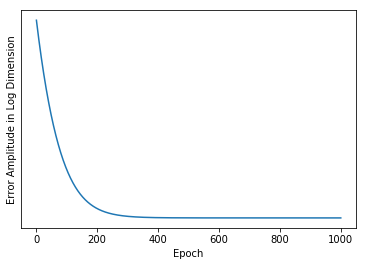

In [3]:
number_of_hidden_layers = 2
number_of_input_layer_units = X_train.shape[0]
number_of_hidden_layer_units = 8
number_of_output_layer_units = 5
number_of_samples = X_train.shape[1]


P_Net = NeuralNetwork([number_of_hidden_layers, number_of_input_layer_units, number_of_hidden_layer_units, \
                       number_of_output_layer_units, number_of_samples])
P_Net.structure_define()

num_epoch = 1000
epoch = np.arange(1, num_epoch+1)
loss = np.zeros((num_epoch, 1))

for i in range(num_epoch):
    P_Net.forward_propagation(X_train)
    loss[i] = P_Net.calculate_network_loss(y_train)
    if (i+1)%100==0: 
        print("Loss in epoch ", (i+1), ": ", loss[i])
    P_Net.backward_propagation(X_train, y_train)

plt.figure(1)
plt.semilogy(epoch, loss)
plt.xlabel('Epoch')
plt.ylabel('Error Amplitude in Log Dimension')
plt.show()

<h1> Performance Test </h1>

In [4]:
P_Net.forward_propagation(X_test)
loss_test = P_Net.calculate_network_loss(y_test)
print("Final Loss: ", loss_test)

y_test = np.where(y_test==1.0, 1, 0)
P_Net.A_3 = np.where(P_Net.A_3>0.50, 1, 0)

avg_prec = 0
avg_rec = 0
avg_f1 = 0

for i in range(y_test.shape[1]):
    avg_prec = avg_prec + precision_score(y_test[:,i], P_Net.A_3[:,i])
    avg_rec = avg_rec + recall_score(y_test[:,i], P_Net.A_3[:,i])
    avg_f1 = avg_f1 + f1_score(y_test[:,i], P_Net.A_3[:,i])
    
print(avg_prec/y_test.shape[1], avg_rec/y_test.shape[1], avg_f1/y_test.shape[1])


Final Loss:  3.272909234550192
0.6472191930207197 0.49705561613958643 0.5423378511710051


<h1> Particle Swarm Optimization on top of Neural Network </h1> 

Iteration Number:  100 Best Cost:  [3.035321]
Iteration Number:  200 Best Cost:  [2.92012885]
Iteration Number:  300 Best Cost:  [2.92012885]
Iteration Number:  400 Best Cost:  [2.92012885]
Iteration Number:  500 Best Cost:  [2.85994969]
Iteration Number:  600 Best Cost:  [2.85994969]
Iteration Number:  700 Best Cost:  [2.78545449]
Iteration Number:  800 Best Cost:  [2.74354458]
Iteration Number:  900 Best Cost:  [2.70600986]
Iteration Number:  1000 Best Cost:  [2.70183889]


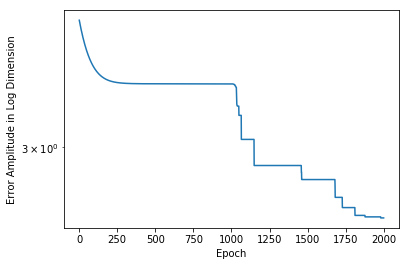

In [5]:
#initialize swarm
particleSwarm = Swarm(P_Net, X_train, y_train, maxIt = 1000, nPop = 50)
particleSwarm.initialize_swarm(P_Net)

#run main loop
epoch, loss = particleSwarm.pso_loop(P_Net, num_epoch, epoch, loss)

#plot continue
plt.figure(1)
plt.semilogy(epoch, loss)
plt.xlabel('Epoch')
plt.ylabel('Error Amplitude in Log Dimension')
plt.show()

<h1> Performance with PSO </h1>

In [6]:
P_Net.forward_propagation(X_test)
loss_test = P_Net.calculate_network_loss(y_test)
print("Final Loss: ", loss_test)

y_test = np.where(y_test==1.0, 1, 0)
P_Net.A_3 = np.where(P_Net.A_3>0.50, 1, 0)

avg_prec = 0
avg_rec = 0
avg_f1 = 0

for i in range(y_test.shape[1]):
    avg_prec = avg_prec + precision_score(y_test[:,i], P_Net.A_3[:,i])
    avg_rec = avg_rec + recall_score(y_test[:,i], P_Net.A_3[:,i])
    avg_f1 = avg_f1 + f1_score(y_test[:,i], P_Net.A_3[:,i])
    
print(avg_prec/y_test.shape[1], avg_rec/y_test.shape[1], avg_f1/y_test.shape[1])


Final Loss:  2.893700907540568
0.6400399854598321 0.8051981097782617 0.6805343511450354
